# Data Mining and Statistics
## Session 2 - Data and Python - ANSWERS
*Peter Stikker - Haarlem, the Netherlands - v1.1*

----

In [1]:
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')

try:
    import numpy as np
    print('numpy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('numpy was not installed, installed and imported')   
    
try:
    import matplotlib.pyplot as plt
    print('matplotlib already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('matplotlib was not installed, installed and imported')

pandas already installed, only imported
numpy already installed, only imported
matplotlib already installed, only imported


## 2.3. Exercise

For this exercise we'll use a datafile that actually comes from another program: R. To understand what the variables mean, you might want to check the documentation about the file, available <a href="https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/ChickWeight">here</a>.

Shout-out to Mr. Van der Meer for the inspiration for this exercise.

*a) Load the chickweight.csv file as a pandas dataframe, and show the first five records*

In [2]:
chicken_df = pd.read_csv("chickweight.csv", sep=',').rename(str.lower, axis='columns') 
chicken_df.head()

,rownum,weight,time,chick,diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1


*b) Show from row numbers 10 to 15 the weight, and diet*

In [3]:
chicken_df.iloc[10:16, [1,4]]

,weight,diet
10,199,1
11,205,1
12,40,1
13,49,1
14,58,1
15,72,1


*c) Show the fields/columns weight and time of chick 1.*

In [4]:
chicken_df[chicken_df['chick']==1].iloc[:,1:3]

,weight,time
0,42,0
1,51,2
2,59,4
3,64,6
4,76,8
5,93,10
6,106,12
7,125,14
8,149,16
9,171,18


*d) Determine the maximum weight for each diet*

In [5]:
max_wght_diet = (
    chicken_df
    .groupby("diet")['weight']
    .max()
)

max_wght_diet

diet
1    305
2    331
3    373
4    322
Name: weight, dtype: int64

*e) Determine the max time per chicken. Sort the results low to high. Which chickens seems not to have made it to the last time of measuring?*

In [6]:
chicken_df.groupby("chick")['time'].max().sort_values()

chick
18     2
16    12
15    14
44    18
8     20
1     21
30    21
31    21
32    21
33    21
34    21
35    21
36    21
38    21
29    21
39    21
40    21
41    21
42    21
43    21
45    21
46    21
47    21
48    21
37    21
28    21
25    21
26    21
2     21
3     21
4     21
5     21
6     21
7     21
9     21
10    21
11    21
27    21
12    21
14    21
17    21
19    21
20    21
21    21
22    21
23    21
24    21
49    21
13    21
50    21
Name: time, dtype: int64

*f) What are the chick numbers of those with the maximum weight for each diet? (note you might need to search the internet a bit for a solution, hint: transform...)*

We can easily obtain the maximum weight per diet, by using the groupby:

In [7]:
chicken_df.groupby('diet')['weight'].max()

diet
1    305
2    331
3    373
4    322
Name: weight, dtype: int64

But, we also want the chick number this belongs to. One approach could be to add the max weight of the diet to the dataframe:

In [8]:
max_weight = chicken_df.groupby('diet')['weight'].max().rename("max weight").reset_index()
chicken_df2 = chicken_df.merge(max_weight)
chicken_df2.head()

,rownum,weight,time,chick,diet,max weight
0,1,42,0,1,1,305
1,2,51,2,1,1,305
2,3,59,4,1,1,305
3,4,64,6,1,1,305
4,5,76,8,1,1,305


And then only select those, where the weight is equal to the max weight:

In [9]:
chicken_df2[np.where(chicken_df2['weight'] == chicken_df2['max weight'], True, False)]

,rownum,weight,time,chick,diet,max weight
83,84,305,21,7,1,305
231,232,331,21,21,2,331
399,400,373,21,35,3,373
553,554,322,21,48,4,322


With **'transform'** we can do this slightly easier.

In [10]:
chicken_df.groupby('diet')['weight'].transform(max)

0      305
1      305
2      305
3      305
4      305
      ... 
573    322
574    322
575    322
576    322
577    322
Name: weight, Length: 578, dtype: int64

It performs the group by, then determined the maximum for each group, and finally shows for each chicken what the maximum weight was of the diet group it belongs to.
Again, we'll need only the ones where this is actually equal to the weight of the chicken, so:

In [11]:
test = chicken_df.groupby('diet')['weight'].transform(max) == chicken_df['weight']
chicken_df[test]

,rownum,weight,time,chick,diet
83,84,305,21,7,1
231,232,331,21,21,2
399,400,373,21,35,3
553,554,322,21,48,4


*g) Show the data of the chicks that did not reach the last time period. Show all their results for their last time period. (note use again the transform)*

In [12]:
test = chicken_df.groupby(['chick'])['time'].transform(max) == chicken_df['time']
chicken_df[test][chicken_df[test]['time'] < 21]

,rownum,weight,time,chick,diet
94,95,125,20,8,1
174,175,68,14,15,1
181,182,54,12,16,1
195,196,35,2,18,1
505,506,146,18,44,4


For a decent explanation of transform, see: https://pbpython.com/pandas_transform.html

# 3. Data Cleaning

In [13]:
#Avoid a warning to replace field
pd.options.mode.chained_assignment = None  # default='warn'

#Adjustments made to data
survey_df = pd.read_csv("StudentStatistics.csv", sep=';').rename(str.lower, axis='columns') 
survey_df['location'] = pd.Categorical(survey_df['location'])
survey_df['oaa_objcourse'] = pd.Categorical(survey_df['oaa_objcourse'], categories = ["Fully Disagree", "Disagree", "Neither disagree nor agree", "Agree", "Fully agree"], ordered = True)
survey_df2 = survey_df[survey_df['gen_classes'] != 0]
survey_df2['gen_age'] = survey_df2['gen_age'].replace(119, np.nan)
my_counts = survey_df2['location'].value_counts().sort_index()

## 3.4. Exercises

**Exercise 1**

*1a) Change the dtype for the field mix_intexcel, first check the scores so you can determine the proper dtype for it*

In [14]:
# check the current dtype:
survey_df2['mix_intexcel'].dtypes

dtype('O')

In [15]:
survey_df2['mix_intexcel'].unique()

array(['not so much', 'somewhat', 'neutral', 'Very much', nan,
       'Not at all'], dtype=object)

In [16]:
survey_df2['mix_intexcel'] = pd.Categorical(survey_df2['mix_intexcel'], categories = ["Not at all", "not so much", "neutral", "somewhat", "Very much"], ordered = True)
survey_df2['mix_intexcel'].dtypes

CategoricalDtype(categories=['Not at all', 'not so much', 'neutral', 'somewhat',
                  'Very much'],
, ordered=True)

*1b) Check the counts of the mix_intexcel field*

In [17]:
survey_df2['mix_intexcel'].value_counts().sort_index()

Not at all      3
not so much     3
neutral        16
somewhat       14
Very much       9
Name: mix_intexcel, dtype: int64

*1c) Create an appropriate diagram to visualise the counts of mix_intexcel*

<AxesSubplot:>

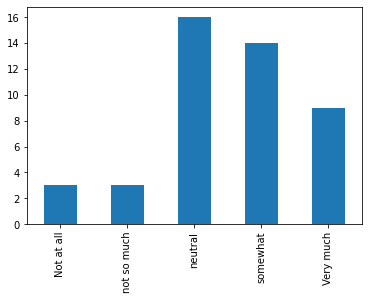

In [18]:
my_counts = survey_df2['mix_intexcel'].value_counts().sort_index()
my_counts.plot(kind = 'bar')

**Exercise 2: Automating the Process**

Below is some code to adjust the dtype for all fields that use the fully disagree to fully agree scale. 

Inspect the code carefully so you understand what it does.

In [19]:
#Create a real copy and not a reference in memory.
survey_df3 = survey_df2.copy()

#The labels we want to use
labels = ["Fully Disagree", "Disagree", "Neither disagree nor agree", "Agree", "Fully agree", np.nan]

#The fields in the data frame
fields = survey_df3.columns

#Loop over each field
for field in fields:
    
    #check if the data type is 'object'
    if survey_df3[field].dtype.name == 'object':
        
        # get the unique values of the field
        values = survey_df3[field].unique()
        
        # check if those values are in our labels
        allin = True
        n_values = len(values)
        i = 0
        while allin and i < n_values:
            allin = values[i] in labels
            i = i + 1
        
        # only if the values are in the labels adjust the dtype
        if allin:
            survey_df3[field] = pd.Categorical(survey_df3[field], categories = ["Fully Disagree", "Disagree", "Neither disagree nor agree", "Agree", "Fully agree"], ordered = True)
            
#Check if it worked
#survey_df3.dtypes

*2a) Create a similar code for the variables that start with 'mat_' and run it.*

In [20]:
survey_df3['mat_burns'].unique()

array(['Not at all', nan, 'neutral', 'not so much', 'Very much',
       'somewhat'], dtype=object)

In [21]:
#Create a real copy and not a reference in memory.
survey_df4 = survey_df3.copy()

#The labels we want to use
labels = ["Not at all", "not so much", "neutral", "somewhat", "Very much", np.nan]

#The fields in the data frame
fields = survey_df4.columns

#Loop over each field
for field in fields:
    
    #check if the data type is 'object'
    if survey_df4[field].dtype.name == 'object':
        
        # get the unique values of the field
        values = survey_df4[field].unique()
        
        # check if those values are in our labels
        allin = True
        n_values = len(values)
        i = 0
        while allin and i < n_values:
            allin = values[i] in labels
            i = i + 1
        
        # only if the values are in the labels adjust the dtype
        if allin:
            survey_df4[field] = pd.Categorical(survey_df4[field], categories = ["Not at all", "not so much", "neutral", "somewhat", "Very much"], ordered = True)
            
#Check if it worked
#survey_df4.dtypes

*2b) Create a codeblock to show the frequencies of all category dtypes in the dataframe*

In [22]:
fields = survey_df4.columns

#Loop over each field
for field in fields:
    if survey_df4[field].dtype.name == 'category':
        print(field)
        print(survey_df4[field].value_counts().sort_index())
        print()

location
Diemen       16
Haarlem      21
Rotterdam    16
Name: location, dtype: int64

oaa_objcourse
Fully Disagree                 9
Disagree                      12
Neither disagree nor agree    11
Agree                         13
Fully agree                    8
Name: oaa_objcourse, dtype: int64

oaa_objclass
Fully Disagree                 5
Disagree                      14
Neither disagree nor agree    13
Agree                         13
Fully agree                    8
Name: oaa_objclass, dtype: int64

oaa_courseexec
Fully Disagree                13
Disagree                      13
Neither disagree nor agree    10
Agree                          7
Fully agree                    6
Name: oaa_courseexec, dtype: int64

oaa_relactobj
Fully Disagree                 4
Disagree                       9
Neither disagree nor agree    17
Agree                         11
Fully agree                   12
Name: oaa_relactobj, dtype: int64

oaa_relactexa
Fully Disagree                 4
Disagree  

*2c) Create a codeblock that shows a bar-chart if the dtype is categorical, and a box-plot if it is a float.*

In [23]:
# Homework exercise   

**Exercise 3: Convert to Numbers**

Although we already changed for *oaa_objcourse* the dtype from *object* to *category* it can be helpful to change it to numeric values. If we use a coding of for example 0 = fully disagree, 1 = disagree,...4 = fully agree. 

*3a) Try to change the *oaa_objcourse* field to a numeric one (hint: use replace, or codes). Check if coding indeed assigned fully disagree to 0.*

In [24]:
# USING REPLACE
# Homework Exercise

In [25]:
# USING CODES
# Homework Exercise

After the values have been converted to numbers, we have no way of knowing anymore what each value represented (except for looking through the code). It can therefor be a good idea to store this information somewhere. One possible option that comes to mind is a dictionary with each entry being the variable name, and as a key another dictionary with the code and the corresponding values.

*3b) Create a dictionary named **codebook** and add the first entry of 'oaa_objcourse' as a dictionary with the appropriate labels*

In [26]:
codebook = {'oaa_objcourse' : {0: "Fully Disagree", 1 : "Disagree", 2 : "Neither disagree nor agree", 3: "Agree", 4: "Fully agree"}}

In [27]:
codebook['oaa_objcourse']

{0: 'Fully Disagree',
 1: 'Disagree',
 2: 'Neither disagree nor agree',
 3: 'Agree',
 4: 'Fully agree'}

Seaborn is a powerful data visualisation library that is often used in data mining. It couldn't hurt to play around a bit with it. So....

*3c) Create a bar-chart and a box-plot with the Seaborn library.*

In [28]:
import seaborn as sns

In [29]:
# Homework Exercise